In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfFeatures = pd.read_csv("../Dataset/Vacunas/training_set_features.csv")
dfFeatures.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
dfLabels = pd.read_csv("../Dataset/Vacunas/training_set_labels.csv", dtype = {"h1n1_vaccine": "bool", "seasonal_vaccine": "bool"})
dfLabels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,False,False
1,1,False,True
2,2,False,False
3,3,False,True
4,4,False,False


In [4]:
df = dfFeatures.merge(dfLabels, on = "respondent_id")
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,False,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,False,True
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,False,True
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,False,False


In [5]:
df["both_vac"] = (df["h1n1_vaccine"] & df["seasonal_vaccine"])
df["none_vac"] = (~df["h1n1_vaccine"] & ~df["seasonal_vaccine"])
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,both_vac,none_vac
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,False,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,False,True,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,False,False,False,True
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,False,True,False,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,False,False,False,True


In [6]:
gbAge = df.groupby("age_group").sum().reset_index()
gbAge

,age_group,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,both_vac,none_vac
0,18 - 34 Years,68816880,7582.0,6274.0,410.0,3658.0,337.0,4143.0,1544.0,1476.0,...,12309.0,19689.0,13527.0,11293.0,5926.0,4673.0,991,1484,680,3420
1,35 - 44 Years,51094044,6407.0,5129.0,272.0,2828.0,265.0,3222.0,1297.0,1195.0,...,9256.0,14585.0,10182.0,8282.0,3648.0,5233.0,761,1395,584,2276
2,45 - 54 Years,70250888,8708.0,7091.0,255.0,3884.0,374.0,4409.0,1733.0,1648.0,...,12431.0,20349.0,13748.0,11121.0,5125.0,3133.0,1020,2102,841,2957
3,55 - 64 Years,74599645,9230.0,7405.0,183.0,4091.0,397.0,4644.0,2043.0,1868.0,...,12813.0,22448.0,15186.0,11486.0,4637.0,759.0,1351,2844,1190,2558
4,65+ Years,91857114,11149.0,7673.0,181.0,4767.0,468.0,5597.0,2930.0,2794.0,...,15226.0,28591.0,18580.0,13249.0,4119.0,346.0,1551,4610,1402,2084


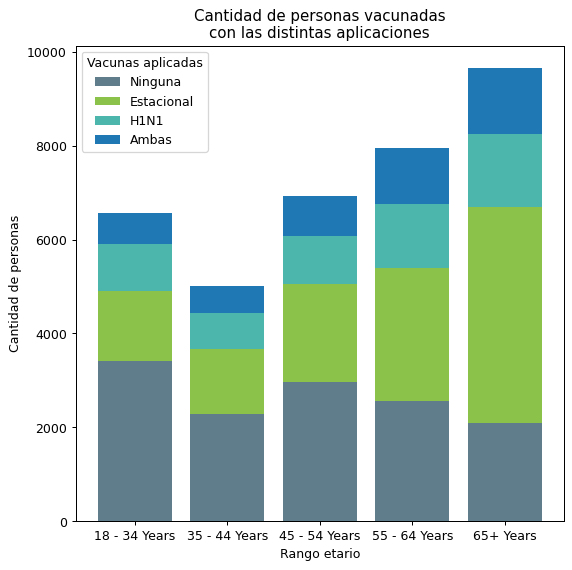

In [7]:
none_vac = gbAge["none_vac"]
seas_vac = gbAge["seasonal_vaccine"]
h1n1_vac = gbAge["h1n1_vaccine"]
both_vac = gbAge["both_vac"]

fig, ax = plt.subplots(dpi = 90, figsize = (7, 7))

ax.bar(gbAge["age_group"], none_vac, label = "Ninguna", color = "#607d8b")
ax.bar(gbAge["age_group"], seas_vac, label = "Estacional", bottom = none_vac, color = "#8bc34a")
ax.bar(gbAge["age_group"], h1n1_vac, label = "H1N1", bottom = seas_vac + none_vac, color = "#4db6ac")
ax.bar(gbAge["age_group"], both_vac, label = "Ambas", bottom = seas_vac + h1n1_vac + none_vac, color = "#1f77b4")

ax.set(xlabel = "Rango etario", ylabel = "Cantidad de personas",
       title = "Cantidad de personas vacunadas\ncon las distintas aplicaciones")
ax.legend(title = "Vacunas aplicadas")
plt.show()

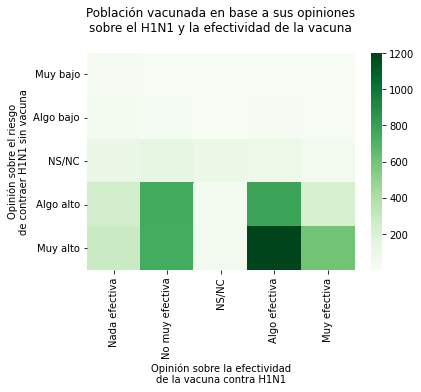

In [8]:
X = "opinion_h1n1_vacc_effective"
Y = "opinion_h1n1_risk"
Z = "h1n1_vaccine"
heatmap = sns.heatmap(df[[X, Y, Z]].groupby([X, Y]).sum().reset_index().pivot(X, Y, Z), cmap = "Greens",
                      xticklabels = ["Nada efectiva", "No muy efectiva", "NS/NC", "Algo efectiva", "Muy efectiva"],
                      yticklabels = ["Muy bajo", "Algo bajo", "NS/NC", "Algo alto", "Muy alto"])
heatmap.set(ylabel = "Opinión sobre el riesgo\nde contraer H1N1 sin vacuna",
            xlabel = "Opinión sobre la efectividad\nde la vacuna contra H1N1",
            title = "Población vacunada en base a sus opiniones\nsobre el H1N1 y la efectividad de la vacuna\n")
plt.show()